**Importing dependecies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

**----- DATA ANALYSIS-----**

**Loading the dataset and initial data analysis**

In [ ]:
dataset = pd.read_csv("digit_dataset.csv") #reading the dataset

In [ ]:
dataset.head() #first 5 rows from the dataset

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
dataset.shape #dimensions of the dataset

(42000, 785)

In [ ]:
dataset.info() #information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
dataset.describe() #statistical info about the data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.00000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00300,0.011190,0.005143,0.000214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000381,0.001310,0.010548,0.027262,0.050905,0.066405,0.129571,...,3.772524,2.748905,1.796452,1.089905,0.563190,0.239571,0.093524,0.024833,0.000857,0.001405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006143,0.035833,0.082357,0.114905,0.178714,0.301452,0.413643,0.513667,0.558833,0.677857,0.60281,0.489238,0.340214,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56812,1.626927,1.053972,0.043916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078072,0.232634,1.131661,2.310396,3.121847,3.259128,4.992894,...,26.957829,22.879248,18.595109,14.434439,10.517823,6.469315,3.976306,1.846016,0.139556,0.287891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.949803,2.350859,3.934280,4.543583,5.856772,7.219742,8.928286,10.004069,10.129595,11.254931,10.69603,9.480066,7.950251,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

**checking missing values**

In [ ]:
missing_values = dataset.isnull().sum() #column wise null values
missing_values = missing_values[missing_values > 0] #return column only if null values > 0
print(missing_values) #no nulls present

Series([], dtype: int64)


**checking class wise value frequency in the target feature**

In [ ]:
dataset["label"].value_counts().sort_index() 

label
0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: count, dtype: int64

**Visualization of above using bar graph**

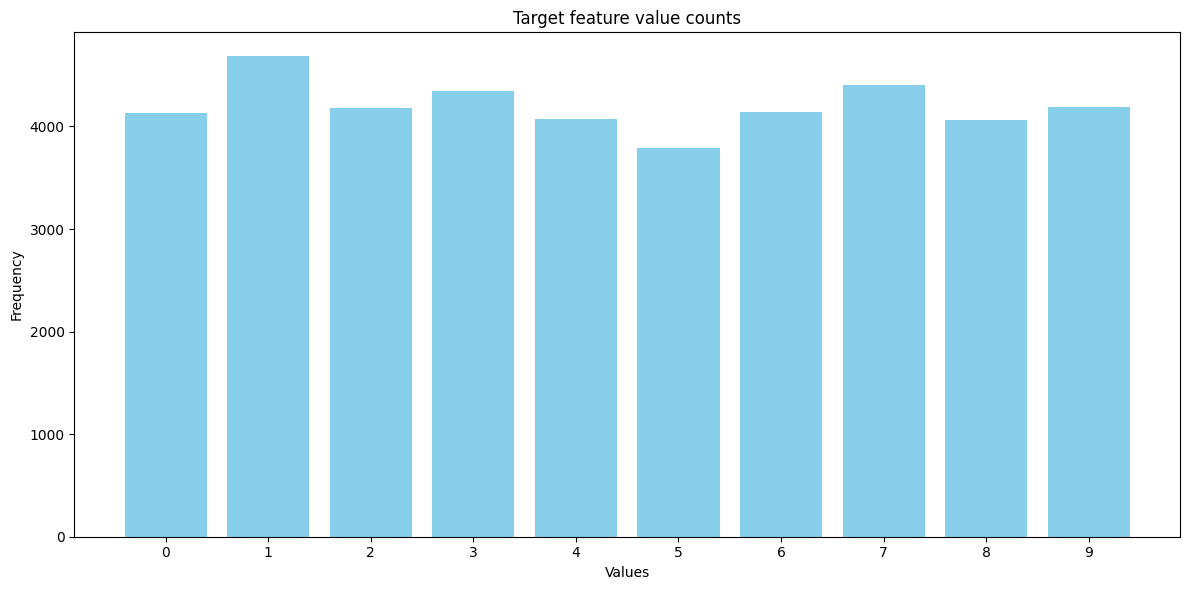

In [ ]:
plt.figure(figsize=(12,6)) #create an empty figure
plt.bar([0,1,2,3,4,5,6,7,8,9], Y.value_counts().sort_index(), color="skyblue") #plotting a bar graph
plt.xticks([0,1,2,3,4,5,6,7,8,9]) #mentioning identities to the bars
plt.title("Target feature value counts") #graph title
plt.xlabel("Values") #x label
plt.ylabel("Frequency") #Y label
plt.tight_layout() #fit the graph
plt.show() #show the graph

**Taking the independent features and the target feature into variables for training**

In [ ]:
X = dataset.iloc[:,1:] #taking all features expect 1st feature (independent features)
Y = dataset["label"] #1st feature (dependent feature)

**Analysis of the above separation**

In [19]:
print(X)

       pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0           0       0       0       0  ...         0         0         0         0
1           0       0       0       0  ...         0         0         0         0
2           0       0       0       0  ...         0         0         0         0
3           0       0       0       0  ...         0         0         0         0
4           0       0       0       0  ...         0         0         0         0
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
41995       0       0       0       0  ...         0         0         0         0
41996       0       0       0       0  ...         0         0         0         0
41997       0       0       0       0  ...         0         0         0         0
41998       0       0       0       0  ...         0         0         0         0
41999       0       0       0       0  ...         0         0         0         0

[42

In [20]:
print(Y)

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64


**----- BUILDING A MODEL -----**

**Splitting the data for training and testing**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=34) #Splitting the data(80% for train, 20% for test)

**Analysing the splitted data**

In [ ]:
print(X_train.shape) ##dimensioins of the splitted data
print(X_test.shape)

(33600, 784)
(8400, 784)


In [ ]:
print(Y_train.shape) #dimensioins of the splitted data
print(Y_test.shape)

(33600,)
(8400,)


**SCALING the data**

In [ ]:
mm_scalar = MinMaxScaler() #intializing the scalar
X_train_transformed = mm_scalar.fit_transform(X_train) #fitting and transforming the train data
X_test_transformed = mm_scalar.transform(X_test) #transforming the test data

**Initializing the model and training it**

In [51]:
model = RandomForestClassifier()
model.fit(X_train_transformed, Y_train)

RandomForestClassifier()

**Prediction for test data**

In [52]:
y_pred = model.predict(X_test)
print(y_pred)

c:\Users\perug\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


[0 5 8 ... 9 3 6]


**----- MODEL EVALUATION ----**

**Finding Accuracy on training and test data**

In [53]:
X_train_prediction = model.predict(X_train_transformed)
X_train_accuracy = accuracy_score(X_train_prediction, Y_train)
print("Training Accuracy: ", X_train_accuracy)

Training Accuracy:  1.0


In [54]:
X_test_prediction = model.predict(X_test_transformed)
X_test_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Test Accuaracy: ", X_test_accuracy)

Test Accuaracy:  0.9633333333333334


**Classification Report**

In [56]:
CR = classification_report(Y_test, y_pred)
print(CR)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       827
           1       0.97      0.99      0.98       937
           2       0.96      0.97      0.96       835
           3       0.96      0.93      0.94       870
           4       0.98      0.97      0.97       814
           5       0.97      0.95      0.96       759
           6       0.98      0.97      0.98       827
           7       0.98      0.96      0.97       880
           8       0.94      0.96      0.95       813
           9       0.95      0.94      0.95       838

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



**Confusion Matrix**

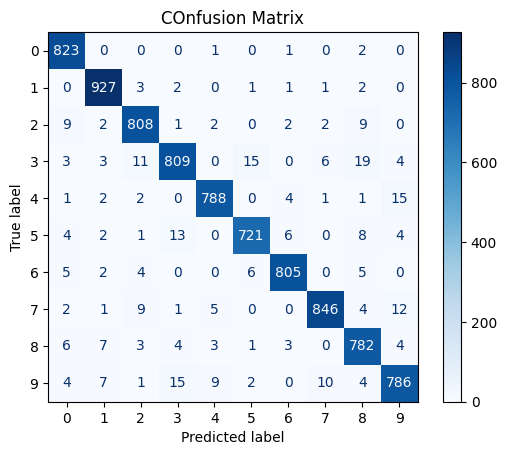

In [58]:
CM = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=[0,1,2,3,4,5,6,7,8,9])
disp.plot(cmap="Blues")
plt.title("COnfusion Matrix")
plt.show()

**Deep check between test and predicted data (optional)**

In [ ]:
for index, (i, j) in enumerate(zip(Y_test, y_pred)):
    if index == 100:
        break
    print(f"{index}: {i} {j}")

0: 0 0
1: 5 5
2: 8 8
3: 3 3
4: 1 1
5: 0 0
6: 2 2
7: 9 9
8: 7 7
9: 6 6
10: 8 8
11: 5 8
12: 9 9
13: 9 9
14: 3 3
15: 8 8
16: 6 6
17: 5 8
18: 8 8
19: 0 0
20: 5 5
21: 4 6
22: 3 3
23: 2 2
24: 7 7
25: 3 3
26: 2 2
27: 5 5
28: 1 1
29: 3 3
30: 2 2
31: 6 6
32: 2 2
33: 6 6
34: 5 5
35: 9 9
36: 3 3
37: 5 5
38: 5 5
39: 5 5
40: 5 8
41: 7 7
42: 5 5
43: 9 9
44: 1 1
45: 7 7
46: 8 8
47: 8 8
48: 3 3
49: 8 8
50: 9 9
51: 0 8
52: 6 6
53: 2 2
54: 1 1
55: 5 5
56: 7 7
57: 7 7
58: 8 8
59: 2 2
60: 3 3
61: 4 4
62: 6 6
63: 7 7
64: 5 5
65: 9 9
66: 5 5
67: 5 1
68: 1 1
69: 2 2
70: 3 3
71: 9 9
72: 3 3
73: 7 1
74: 7 7
75: 9 9
76: 5 5
77: 0 0
78: 5 5
79: 8 8
80: 0 0
81: 6 6
82: 1 1
83: 4 4
84: 1 1
85: 8 8
86: 1 1
87: 2 2
88: 1 1
89: 8 8
90: 3 3
91: 2 2
92: 9 9
93: 0 0
94: 0 0
95: 2 2
96: 7 7
97: 0 0
98: 9 9
99: 6 6
